# Exploration des relevés de données des bâtiments 

## Sommaire

* [1 - Traitement des données](#chapter1)
    * [1.1. Traitement des données de 2015](#section_1_1)
    * [1.2. Traitement des données de 2016](#Section_1_2)
    * [1.3. Création d'un dataset unique](#section_1_3)
        * [Traitement du dataset crée](#section_1_3_1)
        * [Suppression des données aberrantes](#section_1_3_2)
        * [Normalisation des modalités](#section_1_3_3)
    * [1.4. Création de nouvelles variables](#section_1_4)
    * [1.5. Visualisation du dataset crée](#section_1_5)
 
    
    
* [2 - Analyses descriptives](#chapter2)
    * [2.1. Données géographiques](#section_2_1)
    * [2.2. Analyses univariées](#section_2_2)
    * [2.3. Analyses bivariées](#section_2_3)
    


* [3 - Références bibliographiques](#chapter3)

In [371]:
# importation des librairies nécessaires à l'exploration
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import missingno as msno

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import pingouin as pg

In [372]:
# Paramétrage visuel
sns.set_palette("Pastel2")

## 1 - Traitement des données <a class="anchor" id="chapter1"></a>

On va commencer par analyser les jeux de données de manière isolée avant de les regrouper en un seul dataset. On commence donc le chargement des données de 2015 et par regarder la manière dont elles sont présentées. 

### 1.1) Traitement des données de 2015 <a class="anchor" id="section_1_1"></a>

In [373]:
# Chargement du fichier de 2015
filepath_2015 = 'datasets/2015-building-energy-benchmarking.csv'
df_2015 = pd.read_csv(filepath_2015)
df_2015.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081


In [374]:
df_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

Les chaînes de caractères sont écrites en majuscule, on va donc les passer en minuscule avec la première lettre en majuscule. On va aussi s'intéresser aux valeurs manquantes. 

In [375]:
# Passage des chaînes de caractères en minuscule
df_2015['PropertyName'] = df_2015["PropertyName"].str.capitalize()
df_2015['Neighborhood'] = df_2015["Neighborhood"].str.capitalize()

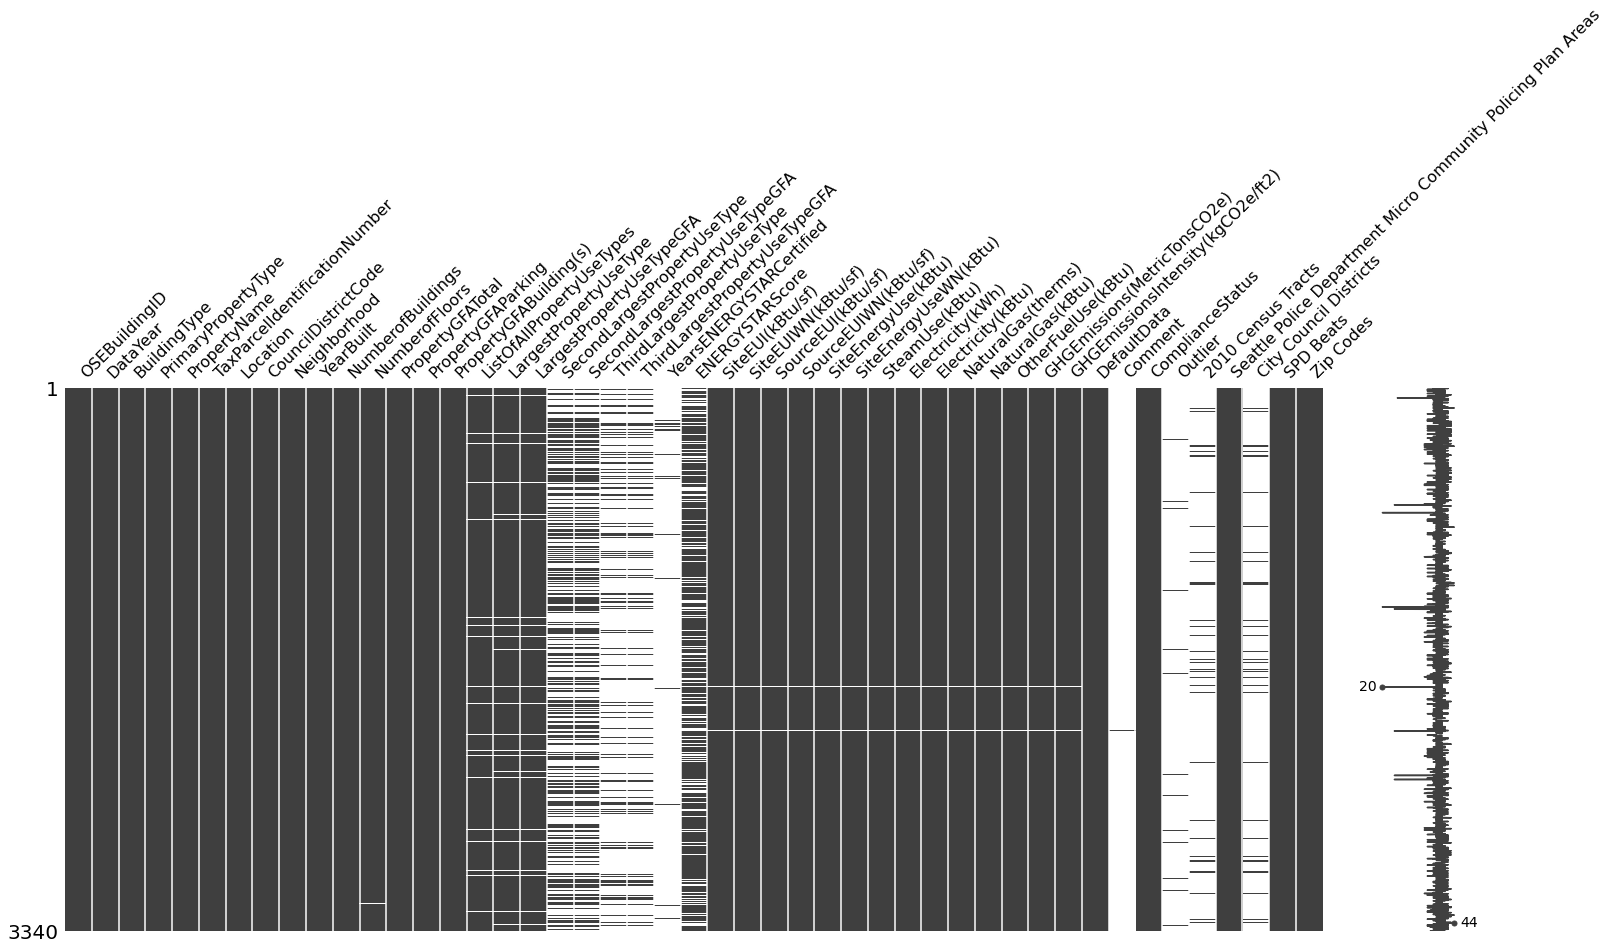

In [376]:
msno.matrix(df_2015);

In [377]:
# Suppression des colonnes avec plus de 50% de valeurs manquantes
# Suppression des lignes avec plus de 4 NaN
df_2015 = df_2015.loc[:, df_2015.isnull().mean() <.50]

In [378]:
# Harmonisation des noms de colonnes avec le dataset de 2016
df_2015.rename(columns={"GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions",
                        "GHGEmissionsIntensity(kgCO2e/ft2)" : "GHGEmissionsIntensity",
                        "Zip Codes" : "ZipCode"}, inplace=True)

### 1.2) Traitement des données de 2016 <a class="anchor" id="section_1_2"></a>

Les données de 2016 sont traitées de la même manière que celle de 2015 pour permettre de pouvoir réunir les deux datasets ensemble. Les colonnes supprimées pour le dataset de 2015 ont été supprimés pour celui de 2016. 

In [379]:
# Chargement du fichier de 2016
filepath_2016 = 'datasets/2016-building-energy-benchmarking.csv'
df_2016 = pd.read_csv(filepath_2016)
df_2016.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19


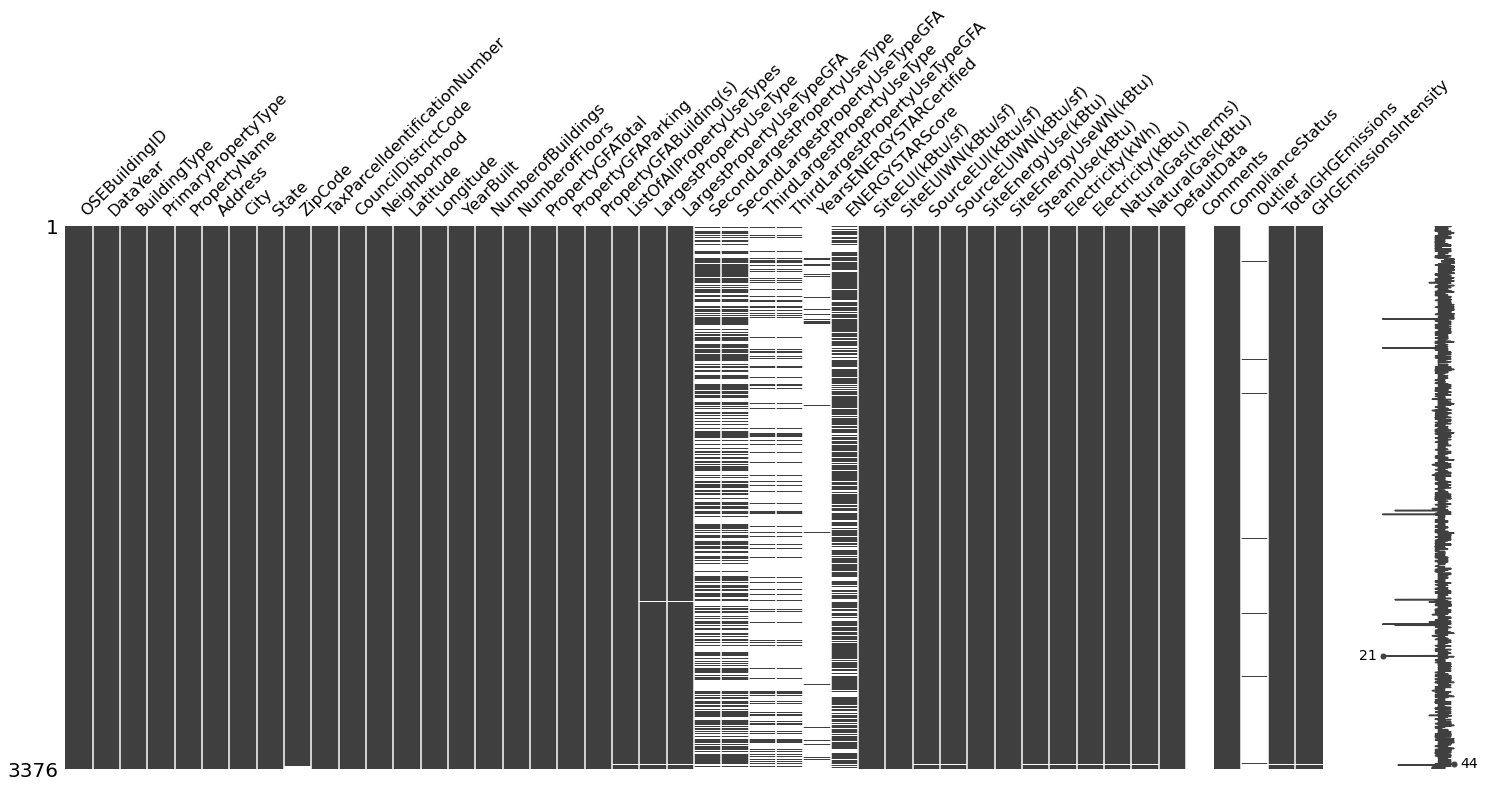

In [380]:
msno.matrix(df_2016);

In [381]:
df_2016['PropertyName'] = df_2016["PropertyName"].str.capitalize()
df_2016['Neighborhood'] = df_2016["Neighborhood"].str.capitalize()

In [382]:
df_2016 = df_2016.loc[:, df_2016.isnull().mean() <.50]

### 1.3) Création d'un dataset avec les données de 2015 & 2016 <a class="anchor" id="section_1_3"></a>

On effectue une jointure entre nos deux datasets pour n'en créer qu'un seul. 

In [383]:
# Jointure entre le dataset de 2015 et de 2016
df = pd.concat([df_2015,df_2016], join="outer", ignore_index=True, verify_integrity=True)
df.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,ZipCode,Address,City,State,Latitude,Longitude
0,1,2015,NonResidential,Hotel,Mayflower park hotel,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,Downtown,1927,...,No,Compliant,14.0,31.0,18081.0,NaN,NaN,NaN,NaN,NaN
1,2,2015,NonResidential,Hotel,Paramount hotel,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,Downtown,1996,...,No,Compliant,14.0,31.0,18081.0,NaN,NaN,NaN,NaN,NaN
2,3,2015,NonResidential,Hotel,Westin hotel,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,Downtown,1969,...,Yes,Compliant,56.0,31.0,18081.0,NaN,NaN,NaN,NaN,NaN


#### 1.3.1) Traitement du dataset crée <a class="anchor" id="section_1_3_1"></a>

Certains bâtiments ont une vocation de résidence. On va donc se concentrer sur la conservation de quatre types de bâtiments qui n'ont pas vocation à servir de résidence. 

In [384]:
# Conservation des bâtiments non résidentiel
df = df.loc[(df["BuildingType"] == "NonResidential") |
            (df["BuildingType"] == "SPS-District K-12")| 
            (df["BuildingType"] == "Nonresidential COS")|
            (df["BuildingType"] == "Campus")]

Certaines chaînes de caractères ne sont pas normalisées et contiennent des différences, on va donc harmoniser ces chaînes de caractères pour éviter d'avoir deux catégories pour la même modalité. 

In [385]:
# Harmonisation des chaînes de caractères
char_correction = {"Distribution Center\n" : "Distribution Center",
                   "Self-Storage Facility\n" : "Self-Storage Facility",
                   "Restaurant\n" : "Restaurant",
                   "Supermarket / Grocery Store": "Supermarket/Grocery Store",
                   "Residence Hall/Dormitory" : "Residence Hall"}

for key, value in char_correction.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

In [386]:
neighborhood_correction = {"Delridge neighborhoods": "Delridge"}

for key, value in neighborhood_correction.items():
    df["Neighborhood"].loc[df["Neighborhood"].str.contains(key, case=False, regex=False)] = value

Enfin, l'observation des différentes modalités du type de propriétés primaires, on remarque qu'il reste des bâtiments à caractère résidentiel. On supprime donc ces entrées pour ne conserver que les bâtiments non-résidentiels.

In [387]:
# retrait des propriétés qui sont résidentiels
df = df.loc[~(df["PrimaryPropertyType"] == "Low-Rise Multifamily")]

#### 1.3.2) Suppression des données aberrantes <a class="anchor" id="section_1_3_2"></a>

On va regarder s'il n'y a pas des valeurs négatives dans le dataset crée.

In [388]:
df.loc[df['Electricity(kBtu)'] < 0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,ZipCode,Address,City,State,Latitude,Longitude
6546,49784,2016,NonResidential,Small- and Mid-Sized Office,Bullitt center,7234600195,NaN,3,Central,2013,...,False,Compliant,NaN,NaN,98122.0,1501 E. Madison St.,Seattle,WA,47.61432,-122.31257


Après recherche, il ne s'agit pas d'une erreur mais d'un bâtiment à énergie positive. Il s'agit bien d'un bâtiment non-résidentiel qui héberge des bureaux. Cet immeuble possède des panneaux solaires pour s'alimenter en électricité et aussi produire de l'électricité verte qui pourra être acheminé à des bâtiments de la ville. Il possède aussi des puits de géothermie, est construit avec des matériaux respectueux de l'environnement et a une orientation qui lui permet de profiter de 82% d'ensoleillement. 


Pour plus d'informations : [Site du bullit center](!https://bullittcenter.org/).

Par précaution, on supprime donc toutes les valeurs énergétiques qui sont inférieures à 0 pour ne pas perturber la suite de l'analyse et la création du modèle. 

In [389]:
df = df.loc[df['Electricity(kBtu)'] > 0]
df = df.loc[df["TotalGHGEmissions"] > 0]
df = df.loc[df["GHGEmissionsIntensity"] > 0]
df = df.loc[df["PropertyGFATotal"] > 0]
df = df.loc[df["SiteEnergyUse(kBtu)"] > 0]

On finit par supprimer les informations non utilisées et redondantes de notre dataset.

In [390]:
# Suppression des colonnes redondantes et non utilisées dans la suite
df.drop(["OSEBuildingID","PropertyName","LargestPropertyUseTypeGFA", "SiteEUI(kBtu/sf)", "SourceEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)",
         "SiteEnergyUseWN(kBtu)", "Electricity(kWh)", "NaturalGas(therms)", "TaxParcelIdentificationNumber","Location","CouncilDistrictCode",
         "ListOfAllPropertyUseTypes", "LargestPropertyUseType",
         "DefaultData", "ComplianceStatus", "State", 
         "Seattle Police Department Micro Community Policing Plan Areas","SPD Beats", "ZipCode"], axis=1, inplace=True)

#### 1.3.3) Harmonisation des modalités <a class="anchor" id="section_1_3_3"></a>

Certains bâtiments ont la même vocation mais ont des appelations différentes. On va les regrouper sous le même nom. 

In [391]:
# Regroupement des établissements scolaires dans une catégorie unique
property_use = {"College/University" : "University",
                "SPS-District K-12" : "K-12 School"}

for key, value in property_use.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

In [392]:
# Regroupement des bureaux dans une catégorie unique
property_type = {"Small- and Mid-Sized Office" : "Office",
                 "Large Office" : "Office", 
                 "Medical Office" : "Office"}

for key, value in property_type.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

In [393]:
df.shape

(3274, 23)

On regarde si la consommation d'énergie a baissé entre l'année 2015 et 2016. On fait de même avec les émissions de gaz à effets de serre. 

In [394]:
energy_2015 = df["SiteEnergyUse(kBtu)"].loc[(df["DataYear"] == 2015)].mean()
energy_2016 = df["SiteEnergyUse(kBtu)"].loc[(df["DataYear"] == 2016)].mean()
diff_energy = energy_2016 - energy_2015

print("Consommation d'énergie en 2015: " + str(energy_2015) + " kBtu")
print("Consommation d'énergie en 2016: " + str(energy_2016) + " kBtu")
print("Différence de consommation entre 2015 et 2016: " + str(diff_energy) + " kBtu")

Consommation d'énergie en 2015: 7738690.622167789 kBtu
Consommation d'énergie en 2016: 8546078.813653013 kBtu
Différence de consommation entre 2015 et 2016: 807388.1914852234 kBtu


In [395]:
co2_2015 = df["TotalGHGEmissions"].loc[(df["DataYear"] == 2015)].mean()
co2_2016 = df["TotalGHGEmissions"].loc[(df["DataYear"] == 2016)].mean()
diff_co2 = co2_2016 - co2_2015


print("Emissions de CO2 en 2015: " + str(co2_2015) + " MetricTonsCO2e")
print("Emissions de CO2 en 2016: " + str(co2_2016) + " MetricTonsCO2e")
print("Différence de consommation entre 2015 et 2016: " + str(diff_co2) + " MetricTonsCO2e")

Emissions de CO2 en 2015: 170.00764237599526 MetricTonsCO2e
Emissions de CO2 en 2016: 186.88524070688618 MetricTonsCO2e
Différence de consommation entre 2015 et 2016: 16.87759833089092 MetricTonsCO2e


### 1.4) Création de nouvelles variables <a class="anchor" id="section_1_4"></a>

On transforme la variable "Nombre d'étages" et "Nombre de bâtiments" en variable catégorielle. 


In [396]:
def nbFloors(row):
    if row["NumberofFloors"] == 0:
        val="0f"
    elif row['NumberofFloors'] == 1:
        val="1f"
    else:
        val="2+f"
    return val

df['NbofFloors'] = df.apply(nbFloors, axis=1)

In [397]:
def nbBuilding(row):
    if row["NumberofBuildings"] == 0:
        val="0b"
    elif row['NumberofBuildings'] == 1:
        val="1b"
    else:
        val="2+b"
    return val

df['NbofBuildings'] = df.apply(nbBuilding, axis=1)


On remplace l'année de construction du bâtiment par son âge

In [398]:
df["Age"] = df["DataYear"] - df["YearBuilt"]

On peut aussi ajouter une variable qui correspond aux "degree-days" (Degré Jour Unifié en France). On a donc récupéré les deux valeurs de ces températures sur ce site : [energystar.gov](!https://portfoliomanager.energystar.gov/pm/degreeDaysCalculator)

In [399]:
def degreeDaysH(row):
    if row["DataYear"] == 2015:
        val = 4005
    else:
        val = 409
    return val

def degreeDaysC(row):
    if row["DataYear"] == 2015:
        val = 4093
    else:
        val = 252
    return val

df['degreeDaysH'] = df.apply(degreeDaysH, axis=1)
df['degreeDaysC'] = df.apply(degreeDaysC, axis=1)

On va créer une variable "Has a Parking".

In [400]:
def HasParking(row):
    if row["PropertyGFAParking"] <= 0:
        val="No"
    else:
        val="Yes"
    return val

df['HasParking'] = df.apply(HasParking, axis=1)

### 1.5) Visualisation du dataset obtenu <a class="anchor" id="section_1_5"></a>

In [401]:
# Suppression des colonnes non utilisées
df.drop(["Address", "DataYear", "BuildingType", "PropertyGFABuilding(s)", "PropertyGFAParking", "Longitude", "Latitude", "SourceEUIWN(kBtu/sf)", "SteamUse(kBtu)",
         "Electricity(kBtu)", "NaturalGas(kBtu)", "OtherFuelUse(kBtu)", "GHGEmissionsIntensity", "City"], axis=1, inplace=True)

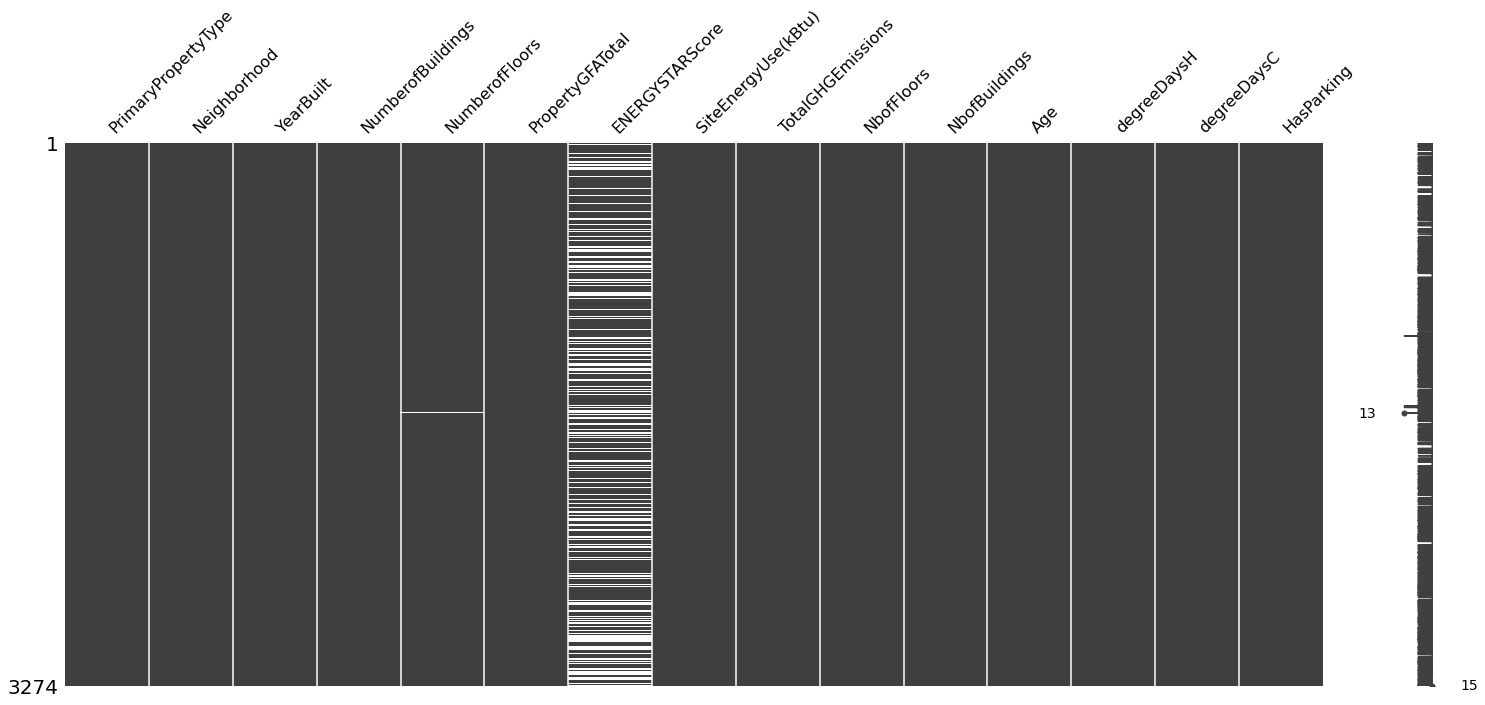

In [402]:
msno.matrix(df);

In [403]:
df.to_csv("datasets/benchmark_total.csv", index=False)

Maintenant que nos données ont été traités et nettoyés, on va sauvegarder ce dataset pour la création du modèle. Dans la suite de ce notebook, on va pouvoir faire l'analyse exploratoire de nos données. 

## 2 - Analyse exploratoire <a class="anchor" id="chapter2"></a>

In [404]:
df.shape

(3274, 15)

###  2.1) Données géographiques <a class="anchor" id="section_2_1"></a>

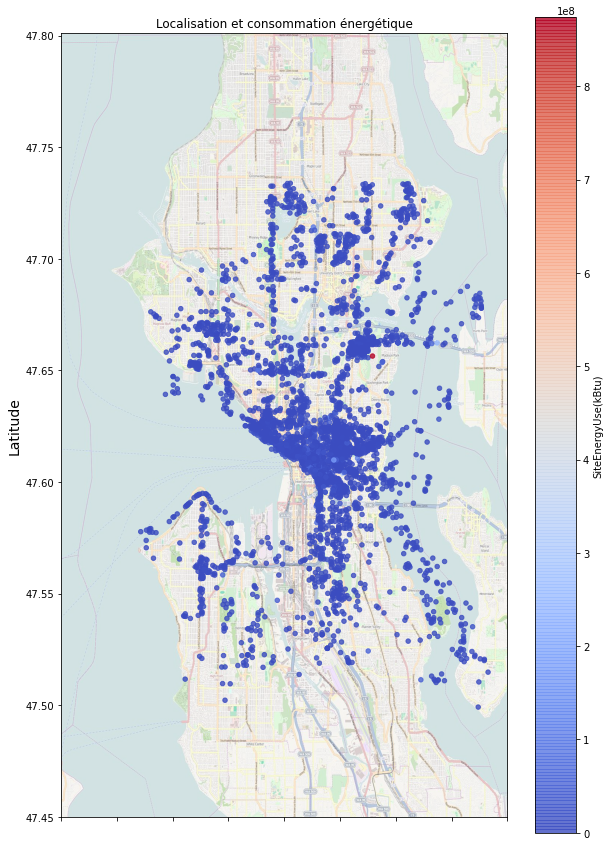

In [405]:
import matplotlib.image as mpimg
seattle_img=mpimg.imread('illustrations/Map_Seattle.jpg')
ax = df_2016.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,15),
        alpha = 0.8, c="SiteEnergyUse(kBtu)", colorbar=True, cmap=plt.get_cmap("coolwarm"))
plt.imshow(seattle_img, extent=[-122.45, -122.25, 47.45, 47.801], alpha=0.6)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Localisation et consommation énergétique")

plt.show()

On observe une concentration de bâtiments non-résidents dans le centre-ville de Seattle. Cela s'explique par le fait que beaucoup de bâtiments non-résidentiels sont des bureaux. Les bâtiments qui se situent en dehors du centre-ville vont être des entrepots, des campus ou encore des hôpitaux.

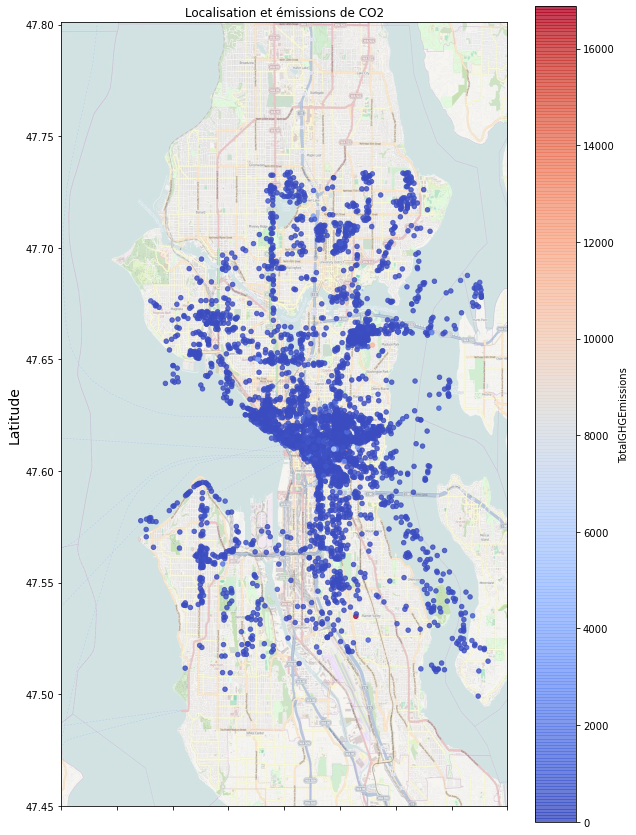

In [406]:
import matplotlib.image as mpimg
seattle_img=mpimg.imread('illustrations/Map_Seattle.jpg')
ax = df_2016.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,15),
        alpha = 0.8, c="TotalGHGEmissions", colorbar=True, cmap=plt.get_cmap("coolwarm"))
plt.imshow(seattle_img, extent=[-122.45, -122.25, 47.45, 47.801], alpha=0.6)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Localisation et émissions de CO2")

plt.show()

La répartition des bâtiments est la même que pour la consommation d'énergie.

### 2.2) Analyses univariées <a class="anchor" id="section2_2"></a>

In [407]:
# Séparation des variables catégorielles et numériques
cat_var = ["PrimaryPropertyType", "Neighborhood", "HasParking",
           "NumberofBuildings", "NumberofFloors", "NbofBuildings", "NbofFloors"]

num_var = ["YearBuilt","ENERGYSTARScore", "PropertyGFATotal",
           "SiteEnergyUse(kBtu)", "TotalGHGEmissions", "Age"]

- Distribution des variables catégorielles

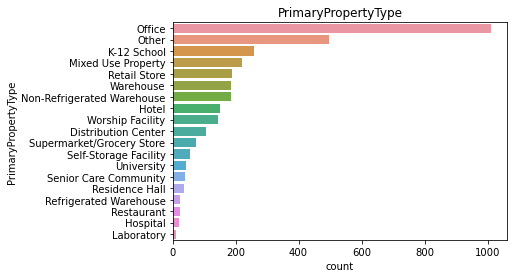

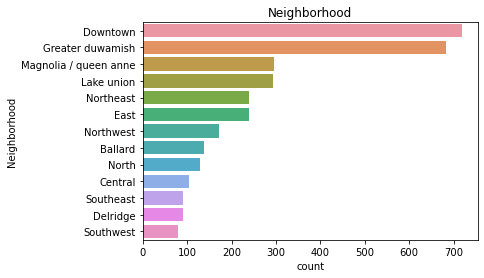

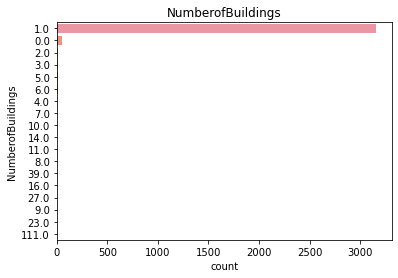

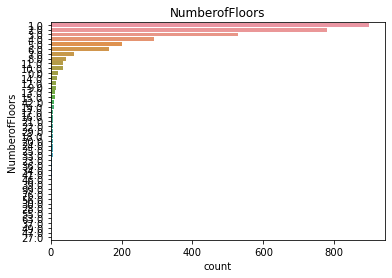

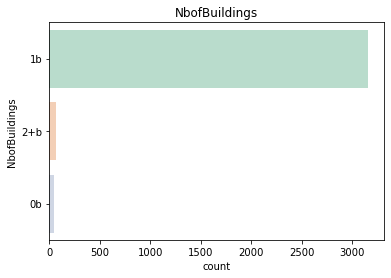

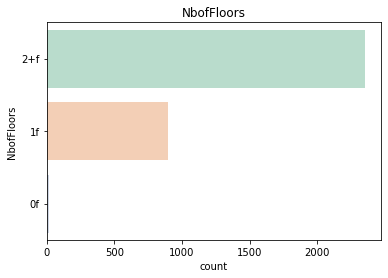

In [408]:
for cols in cat_var:
    sns.countplot(y=cols, data=df, order=df[cols].value_counts().index)
    plt.title(cols)
    plt.show()

- Distribution des variables quantitatives

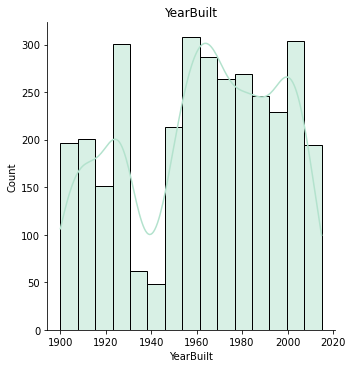

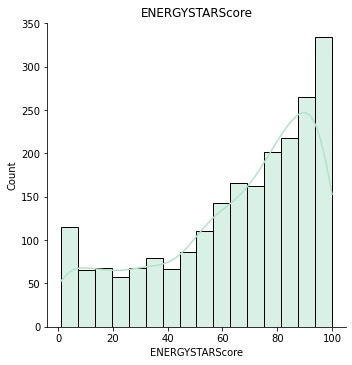

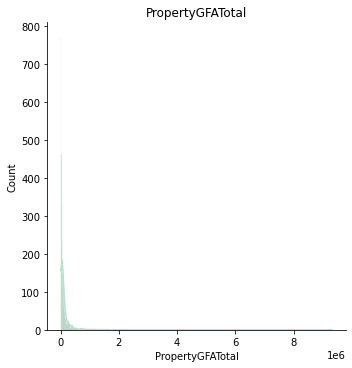

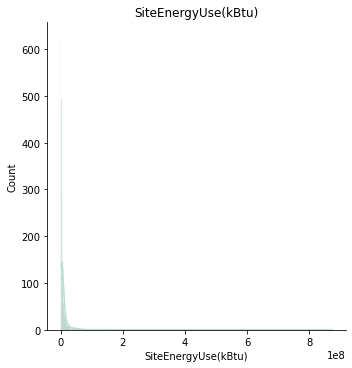

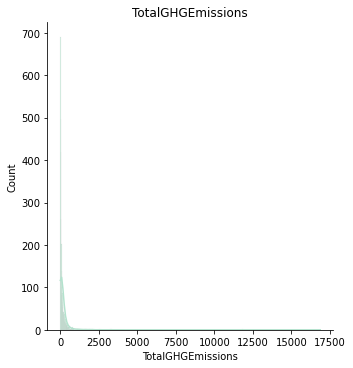

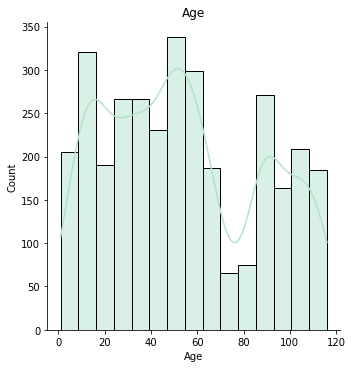

In [409]:
for cols in num_var:
    sns.displot(x=cols, data=df, kde=True)
    plt.title(cols)
    plt.show()

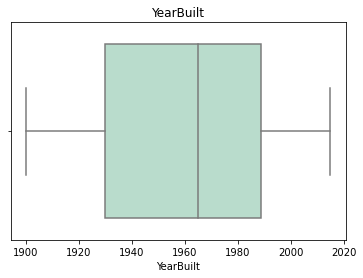

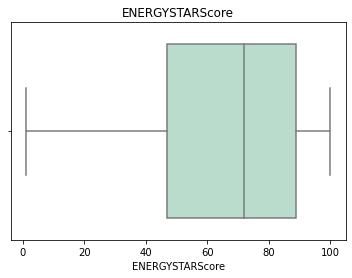

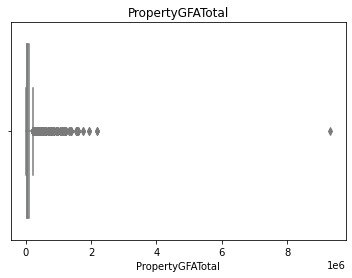

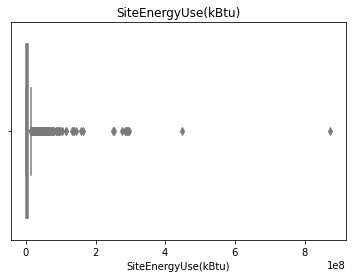

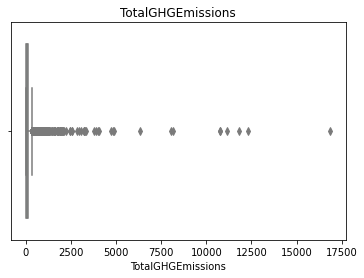

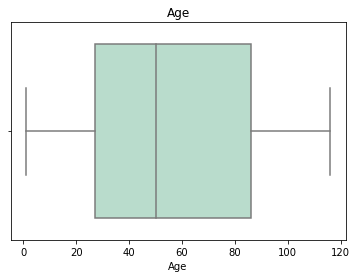

In [410]:
for cols in num_var:
    sns.boxplot(x=cols, data=df)
    plt.title(cols)
    plt.show()

In [411]:
pg.normality(df,method="normaltest")

,W,pval,normal
YearBuilt,1045.490858,9.430717e-228,False
NumberofBuildings,9488.965117,0.000000e+00,False
NumberofFloors,3788.706147,0.000000e+00,False
PropertyGFATotal,6817.771698,0.000000e+00,False
ENERGYSTARScore,222.658334,4.470510e-49,False
SiteEnergyUse(kBtu),6821.181840,0.000000e+00,False
TotalGHGEmissions,6135.964454,0.000000e+00,False
Age,1045.528407,9.255312e-228,False
degreeDaysH,11500.315528,0.000000e+00,False
degreeDaysC,11500.315528,0.000000e+00,False


In [412]:
pg.homoscedasticity(df, method="levene")

,W,pval,equal_var
levene,NaN,NaN,False


Nos données ne semblent pas suivre une loi normale et l'homogénéité des variances n'est pas respectée. 

In [413]:
df.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Age,degreeDaysH,degreeDaysC
count,3274.000000,3274.000000,3266.000000,3.274000e+03,2206.000000,3.274000e+03,3274.000000,3274.000000,3274.000000,3274.000000
mean,1961.653329,1.118815,4.144519,1.159785e+05,64.798277,8.143371e+06,178.467062,53.847892,2202.606597,2167.807269
std,32.691858,2.234003,6.594159,2.516923e+05,28.535114,2.537712e+07,669.746081,32.692104,1798.269282,1920.787629
min,1900.000000,0.000000,0.000000,1.128500e+04,1.000000,4.429350e+04,0.310000,1.000000,409.000000,252.000000
25%,1930.000000,1.000000,1.000000,2.940000e+04,47.000000,1.243893e+06,20.092500,27.000000,409.000000,252.000000
50%,1965.000000,1.000000,2.000000,4.906600e+04,72.000000,2.547715e+06,49.550000,50.000000,409.000000,252.000000
75%,1989.000000,1.000000,4.000000,1.051000e+05,89.000000,6.983159e+06,139.370000,86.000000,4005.000000,4093.000000
max,2015.000000,111.000000,99.000000,9.320156e+06,100.000000,8.739237e+08,16870.980000,116.000000,4005.000000,4093.000000


In [414]:
df.groupby("PrimaryPropertyType")["TotalGHGEmissions"].mean().sort_values(ascending=False)

PrimaryPropertyType
Hospital                      4868.863000
Laboratory                     827.916364
University                     745.459545
Hotel                          400.655235
Senior Care Community          378.283333
Mixed Use Property             232.344338
Supermarket/Grocery Store      227.941600
Other                          223.332535
Restaurant                     170.216818
Office                         113.931255
K-12 School                     91.864981
Residence Hall                  88.334722
Retail Store                    88.066947
Distribution Center             50.105472
Warehouse                       42.494492
Worship Facility                41.718252
Non-Refrigerated Warehouse      40.041452
Refrigerated Warehouse          36.185000
Self-Storage Facility           23.674727
Name: TotalGHGEmissions, dtype: float64

In [415]:
df.groupby("PrimaryPropertyType")["SiteEnergyUse(kBtu)"].mean().sort_values(ascending=False)

PrimaryPropertyType
Hospital                      1.360147e+08
University                    3.816379e+07
Laboratory                    2.620197e+07
Hotel                         1.227962e+07
Senior Care Community         1.170678e+07
Mixed Use Property            1.004706e+07
Other                         1.002688e+07
Supermarket/Grocery Store     9.949897e+06
Office                        8.420430e+06
Restaurant                    4.893484e+06
Retail Store                  4.889869e+06
Refrigerated Warehouse        3.665475e+06
Residence Hall                3.138390e+06
K-12 School                   3.062534e+06
Distribution Center           2.801173e+06
Warehouse                     1.961577e+06
Non-Refrigerated Warehouse    1.735725e+06
Worship Facility              1.171687e+06
Self-Storage Facility         9.281363e+05
Name: SiteEnergyUse(kBtu), dtype: float64

In [416]:
df.groupby("Neighborhood")["TotalGHGEmissions"].mean().sort_values(ascending=False)

Neighborhood
East                     474.876167
Northeast                226.510208
Downtown                 216.464708
Lake union               190.329010
Central                  167.191538
Northwest                146.940174
Southwest                142.147875
Magnolia / queen anne    139.761554
Southeast                110.700440
Ballard                  105.854964
Delridge                  98.790110
Greater duwamish          94.043470
North                     89.767674
Name: TotalGHGEmissions, dtype: float64

In [417]:
df.groupby("Neighborhood")["SiteEnergyUse(kBtu)"].mean().sort_values(ascending=False)

Neighborhood
East                     1.419325e+07
Downtown                 1.223578e+07
Northeast                1.083887e+07
Lake union               1.002276e+07
Central                  6.375709e+06
Magnolia / queen anne    6.367641e+06
Northwest                5.757678e+06
Southwest                4.657378e+06
Greater duwamish         4.548910e+06
Delridge                 4.461552e+06
North                    4.262623e+06
Ballard                  4.232320e+06
Southeast                4.157300e+06
Name: SiteEnergyUse(kBtu), dtype: float64

### 2.3) Analyses bivariées <a class="anchor" id="section_2_3"></a>

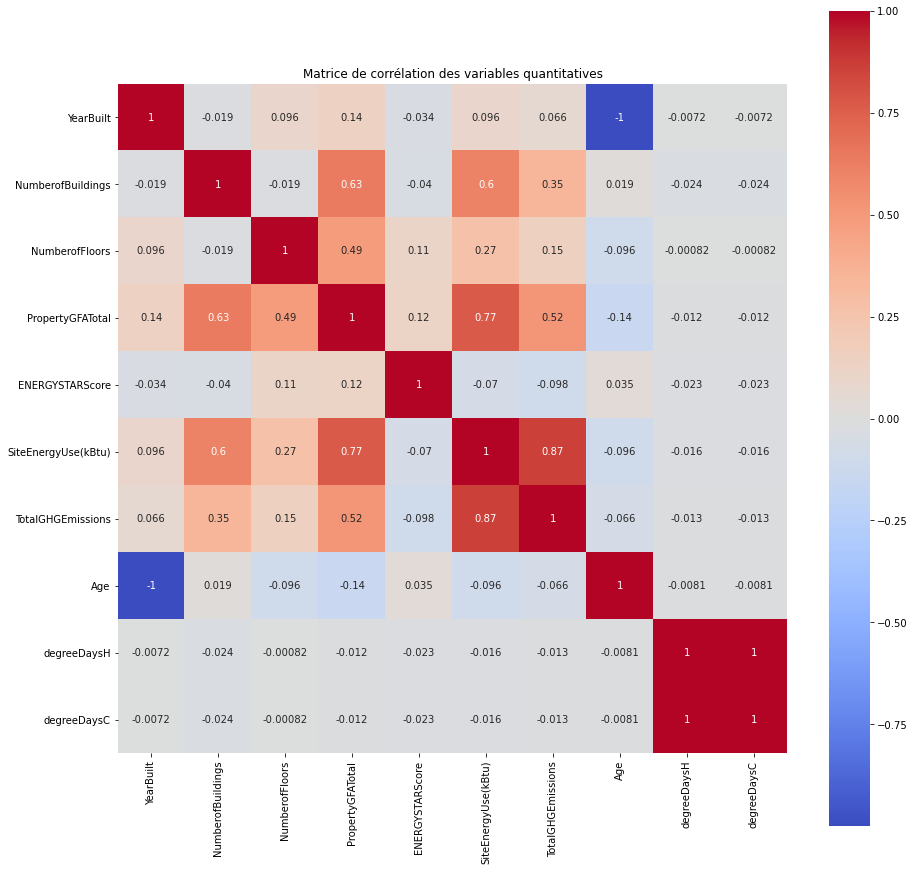

In [418]:
matrix = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(matrix, square=True, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

On observe une forte corrélation entre la consommation d'énergie et les émissions de gaz à effets de serre. 

In [419]:
matrix['SiteEnergyUse(kBtu)'].sort_values(ascending=False)

SiteEnergyUse(kBtu)    1.000000
TotalGHGEmissions      0.865509
PropertyGFATotal       0.771064
NumberofBuildings      0.603561
NumberofFloors         0.271500
YearBuilt              0.096397
degreeDaysH           -0.015910
degreeDaysC           -0.015910
ENERGYSTARScore       -0.070043
Age                   -0.096153
Name: SiteEnergyUse(kBtu), dtype: float64

La superficie des propriétés et le nombre de bâtiments sont très fortement corrélés avec la consommation d'énergie. 

In [420]:
matrix['TotalGHGEmissions'].sort_values(ascending=False)

TotalGHGEmissions      1.000000
SiteEnergyUse(kBtu)    0.865509
PropertyGFATotal       0.521109
NumberofBuildings      0.348877
NumberofFloors         0.152761
YearBuilt              0.066332
degreeDaysH           -0.012602
degreeDaysC           -0.012602
Age                   -0.066139
ENERGYSTARScore       -0.098024
Name: TotalGHGEmissions, dtype: float64

La superficie des propriétés et le nombre de bâtiments sont moyennement corrélés avec la consommation d'énergie. 

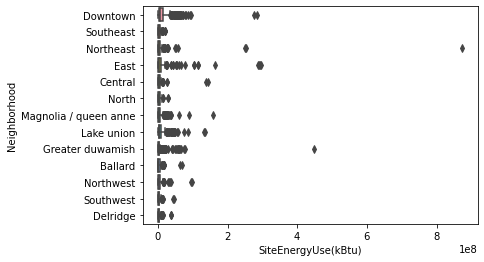

In [421]:
sns.boxplot(x="SiteEnergyUse(kBtu)", y="Neighborhood", data=df)
plt.show()

In [422]:
pg.anova(data=df, dv="SiteEnergyUse(kBtu)", between="Neighborhood")

,Source,ddof1,ddof2,F,p-unc,np2
0,Neighborhood,12,3261,5.570539,1.585178e-09,0.020087


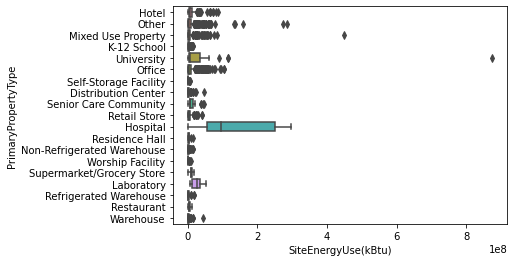

In [423]:
sns.boxplot(x="SiteEnergyUse(kBtu)", y="PrimaryPropertyType", data=df)
plt.show()

In [424]:
pg.anova(data=df, dv="SiteEnergyUse(kBtu)", between="PrimaryPropertyType")

,Source,ddof1,ddof2,F,p-unc,np2
0,PrimaryPropertyType,18,3255,44.215295,6.955759e-140,0.19647


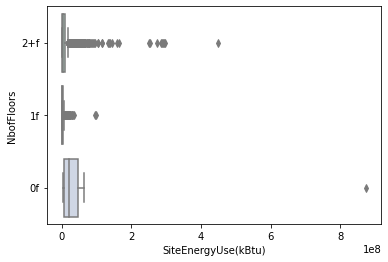

In [425]:
sns.boxplot(x="SiteEnergyUse(kBtu)", y="NbofFloors", data=df)
plt.show()

In [426]:
pg.anova(data=df, dv="SiteEnergyUse(kBtu)", between="NbofFloors")

,Source,ddof1,ddof2,F,p-unc,np2
0,NbofFloors,2,3271,73.945114,3.898125e-32,0.043257


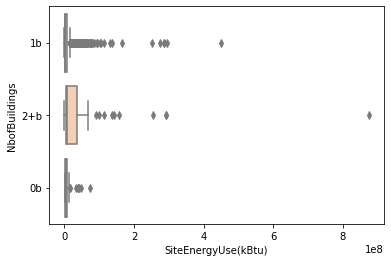

In [427]:
sns.boxplot(x="SiteEnergyUse(kBtu)", y="NbofBuildings", data=df)
plt.show()

In [428]:
pg.anova(data=df, dv="SiteEnergyUse(kBtu)", between="NbofBuildings")

,Source,ddof1,ddof2,F,p-unc,np2
0,NbofBuildings,2,3271,92.614045,7.512979e-40,0.053593


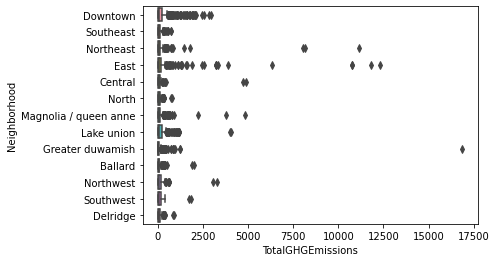

In [429]:
sns.boxplot(x="TotalGHGEmissions", y="Neighborhood", data=df)
plt.show()

In [430]:
pg.anova(data=df, dv="TotalGHGEmissions", between="Neighborhood")

,Source,ddof1,ddof2,F,p-unc,np2
0,Neighborhood,12,3261,5.871844,3.463709e-10,0.021151


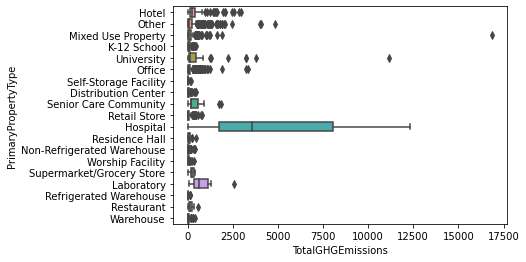

In [431]:
sns.boxplot(x="TotalGHGEmissions", y="PrimaryPropertyType", data=df)
plt.show()

In [432]:
pg.anova(data=df, dv="TotalGHGEmissions", between="PrimaryPropertyType")

,Source,ddof1,ddof2,F,p-unc,np2
0,PrimaryPropertyType,18,3255,90.800957,5.060120e-271,0.334276


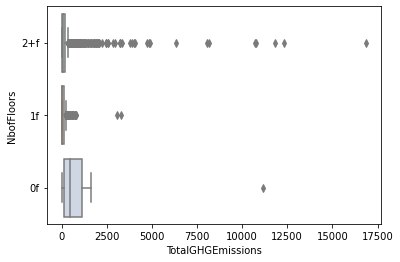

In [433]:
sns.boxplot(x="TotalGHGEmissions", y="NbofFloors", data=df)
plt.show()

In [434]:
pg.anova(data=df, dv="TotalGHGEmissions", between="NbofFloors")

,Source,ddof1,ddof2,F,p-unc,np2
0,NbofFloors,2,3271,29.235163,2.603000e-13,0.017561


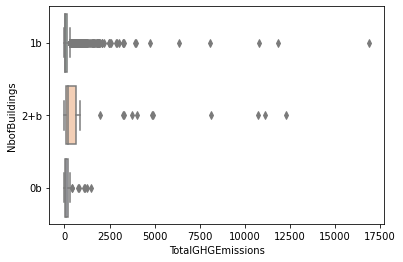

In [435]:
sns.boxplot(x="TotalGHGEmissions", y="NbofBuildings", data=df)
plt.show()

In [436]:
pg.anova(data=df, dv="TotalGHGEmissions", between="NbofBuildings")

,Source,ddof1,ddof2,F,p-unc,np2
0,NbofBuildings,2,3271,88.694992,3.079275e-38,0.051441


## 3) Références bibliographiques et définitions <a class="anchor" id="chapter3"></a>

**Définitions**
- **SiteEnergyUse :** The annual amount of energy consumed by the property from all sources of energy.
- **GHGEmissions :** The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.

*Source* : [Ville de Seattle](!https://data.seattle.gov/dataset/2015-Building-Energy-Benchmarking/h7rm-fz6m)

**Sources :**

- [Différence entre source et site](!https://www.energystar.gov/buildings/benchmark/understand_metrics/source_site_difference)
- [Définition de l'EUI](!https://www.energystar.gov/buildings/benchmark/understand_metrics/what_eui)
- [Energy Star Score](!https://www.energystar.gov/buildings/benchmark/analyze_benchmarking_results)
- [Définition des types de bâtiments](!https://portfoliomanager.energystar.gov/pm/glossary)